In [46]:
import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [47]:
sns.set_style(style='whitegrid')

In [48]:
experiment_results_path = Path(os.getcwd()).parent / 'experiment_results'
with_reasons_path = experiment_results_path / 'with-reasons'

with_reasons_gpt3point5_gpt3point5_path = with_reasons_path / 'gpt-3.5-turbo_gpt-3.5-turbo'
with_reasons_gpt4_gpt4_path = with_reasons_path / 'gpt-4_gpt-4'
with_reasons_experiment_paths = [with_reasons_gpt3point5_gpt3point5_path, with_reasons_gpt4_gpt4_path]

random_path = experiment_results_path / 'random'
random_gpt3point5_gpt3point5_path = random_path / 'gpt-3.5-turbo_gpt-3.5-turbo'
random_gpt4_gpt4_path = random_path / 'gpt-4_gpt-4'
random_experiment_paths = [random_gpt3point5_gpt3point5_path, random_gpt4_gpt4_path]

In [49]:
def get_results(results_path):
    experiment_results = {}
    for exp_path in results_path:
        files = [path for path in (exp_path / "outputs" / "evaluation").iterdir() if path.is_file()]
        for file in files:
            with open(file, 'r') as f:
                data = json.load(f)
                if exp_path.name not in experiment_results:
                    experiment_results[exp_path.name] = []
                experiment_results[exp_path.name].append({
                    "trial": int(file.name.replace(".json", "")),
                    "accuracy": data["accuracy"],
                    "total": data["total"],
                    "correct": data["correct"],
                    "incorrect": data["incorrect"],
                })
                
    for exp_path in results_path:
        experiment_results[exp_path.name].sort(key=lambda x: x["trial"])
    return experiment_results

In [92]:
def plot_results(results):
    colors = ["#116A7B", "#7EAA92"]
    fig, ax = plt.subplots(figsize=(10, 5))
    for idx, experiment_path in enumerate(with_reasons_experiment_paths):
        df = pd.DataFrame(results[experiment_path.name])
        # df["accuracy"] = df["correct"] / df["total"]
        sns.lineplot(data=df, x="trial", y="accuracy", label=experiment_path.name.split('_')[0], color=colors[idx])
        ax.set_xlabel("Generation")
        ax.set_ylabel("Accuracy")
        ax.set_ylim([0.5, 1])
        ax.set_xticks(range(0, 10, 1))
        ax.set_yticks([y / 100 for y in range(50, 110, 10)])
        
        max_accuracy = df["accuracy"].max()
        max_accuracy_trial = df[df["accuracy"] == max_accuracy]["trial"].values[0]
        ax.scatter(max_accuracy_trial, max_accuracy, s=50, color=colors[idx])
        ax.lines[-1].set_color(colors[idx])
        ax.annotate(f"{max_accuracy:.2f}", (max_accuracy_trial, max_accuracy), xytext=(max_accuracy_trial - 0.15, max_accuracy + 0.02))
        # ax.axvline(x=max_accuracy_trial, color=colors[idx], linestyle='--')
        
        initial_accuracy = df[df["trial"] == 0]["accuracy"].values[0]
        ax.scatter(0, initial_accuracy, s=50, color=colors[idx], marker='s')
        ax.annotate(f"{initial_accuracy:.2f}", (0, initial_accuracy), xytext=(-0.15, initial_accuracy + 0.02))
        # ax.axhline(y=initial_accuracy, color=colors[idx], linestyle='--')
    ax.legend()
    ax.legend(loc='lower right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    ax.grid(False)
    return fig

In [93]:
reasons_results = get_results(with_reasons_experiment_paths)
random_results = get_results(random_experiment_paths)

In [94]:
highest_acc = reasons_results['gpt-3.5-turbo_gpt-3.5-turbo'][0]['accuracy']

for i in range(len(reasons_results['gpt-3.5-turbo_gpt-3.5-turbo'])):
    reasons_results['gpt-3.5-turbo_gpt-3.5-turbo'][i]['accuracy'] = max(reasons_results['gpt-3.5-turbo_gpt-3.5-turbo'][i]['accuracy'], highest_acc)
    highest_acc = reasons_results['gpt-3.5-turbo_gpt-3.5-turbo'][i]['accuracy']

In [95]:
highest_acc = reasons_results['gpt-4_gpt-4'][0]['accuracy']

for i in range(len(reasons_results['gpt-4_gpt-4'])):
    reasons_results['gpt-4_gpt-4'][i]['accuracy'] = max(reasons_results['gpt-4_gpt-4'][i]['accuracy'], highest_acc)
    highest_acc = reasons_results['gpt-4_gpt-4'][i]['accuracy']

In [96]:
highest_acc = random_results['gpt-3.5-turbo_gpt-3.5-turbo'][0]['accuracy']

for i in range(len(random_results['gpt-3.5-turbo_gpt-3.5-turbo'])):
    random_results['gpt-3.5-turbo_gpt-3.5-turbo'][i]['accuracy'] = max(random_results['gpt-3.5-turbo_gpt-3.5-turbo'][i]['accuracy'], highest_acc)
    highest_acc = random_results['gpt-3.5-turbo_gpt-3.5-turbo'][i]['accuracy']

In [97]:
highest_acc = random_results['gpt-4_gpt-4'][0]['accuracy']

for i in range(len(random_results['gpt-4_gpt-4'])):
    random_results['gpt-4_gpt-4'][i]['accuracy'] = max(random_results['gpt-4_gpt-4'][i]['accuracy'], highest_acc)
    highest_acc = random_results['gpt-4_gpt-4'][i]['accuracy']

In [108]:
def plot_results(results):
    colors = ["#116A7B", "#7EAA92"]
    fig, ax = plt.subplots(figsize=(10, 5))
    for idx, experiment_path in enumerate(with_reasons_experiment_paths):
        df = pd.DataFrame(results[experiment_path.name])
        df["accuracy_raw"] = df["correct"] / df["total"]
        sns.lineplot(data=df, x="trial", y="accuracy", label=experiment_path.name.split('_')[0], color=colors[idx])
        ax.set_xlabel("Generation")
        ax.set_ylabel("Accuracy")
        ax.set_ylim([0.5, 1])
        ax.set_xticks(range(0, 10, 1))
        ax.set_yticks([y / 100 for y in range(50, 110, 10)])
        
        max_accuracy = df["accuracy"].max()
        max_accuracy_trial = df[df["accuracy"] == max_accuracy]["trial"].values[0]
        ax.scatter(max_accuracy_trial, max_accuracy, s=50, color=colors[idx])
        ax.lines[-1].set_color(colors[idx])
        ax.annotate(f"{max_accuracy:.2f}", (max_accuracy_trial, max_accuracy), xytext=(max_accuracy_trial - 0.15, max_accuracy + 0.02))
        # ax.axvline(x=max_accuracy_trial, color=colors[idx], linestyle='--')
        
        initial_accuracy = df[df["trial"] == 0]["accuracy"].values[0]
        ax.scatter(0, initial_accuracy, s=50, color=colors[idx], marker='s')
        ax.annotate(f"{initial_accuracy:.2f}", (0, initial_accuracy), xytext=(-0.15, initial_accuracy + 0.02))
        # ax.axhline(y=initial_accuracy, color=colors[idx], linestyle='--')
        sns.lineplot(data=df, x="trial", y="accuracy_raw", label=experiment_path.name.split('_')[0], color=colors[idx], linestyle='--')
    # Override legend labels
    handles, labels = ax.get_legend_handles_labels()
    labels[0] = 'GPT-3.5 (Elite)'
    labels[1] = 'GPT-3.5 (Current)'
    labels[2] = 'GPT-4 (Elite)'
    labels[3] = 'GPT-4 (Current)'
    ax.legend(handles=handles, labels=labels, loc='lower right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    ax.grid(False)
    return fig

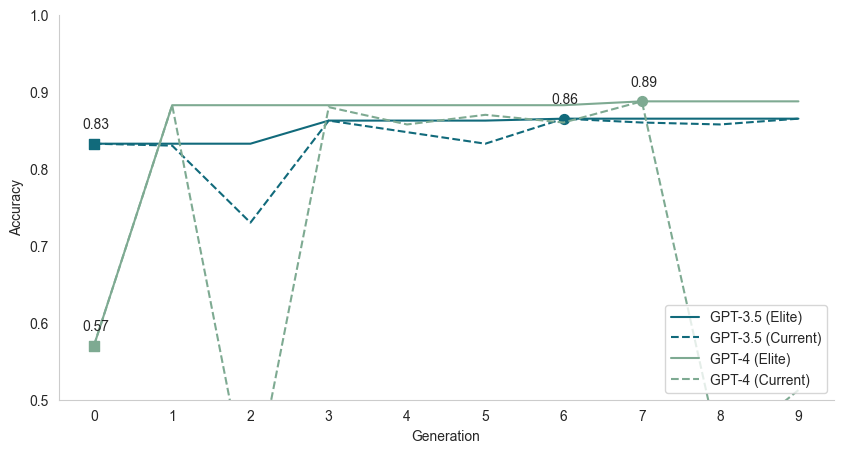

In [109]:
reasons_fig = plot_results(reasons_results)
reasons_fig.savefig("reasons_optimization_graph.png", dpi=300, bbox_inches='tight')

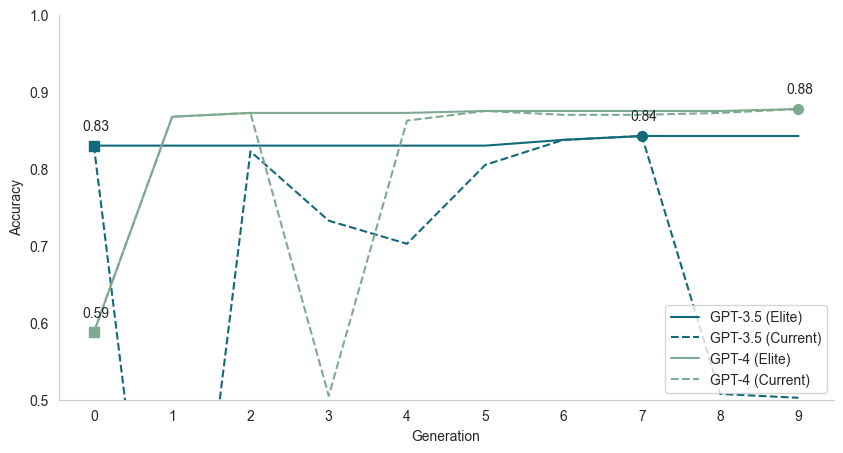

In [110]:
random_fig = plot_results(random_results)
random_fig.savefig("random_optimization_graph.png", dpi=300, bbox_inches='tight')

In [83]:
df = pd.read_csv('../data/GGWP-Toxic-Behavior/data/labeled/combined.csv')

In [45]:
df.head()

,index,text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,real faker tweet,0,0,0,0,0,0
1,1,Lmfao,0,0,0,0,0,0
2,2,"bruh, the best teemo player from my country is...",0,0,0,0,0,0
3,3,me and nunu tiered 3 simped for adc,0,0,0,0,0,0
4,4,yeah but i think since seraphine was released ...,0,0,0,0,0,0


In [12]:
dataset = {}

dataset['toxic'] = df[df['toxic'] == 1].shape[0]
dataset['severe_toxic'] = df[df['severe_toxic'] == 1].shape[0]
dataset['obscene'] = df[df['obscene'] == 1].shape[0]
dataset['threat'] = df[df['threat'] == 1].shape[0]
dataset['insult'] = df[df['insult'] == 1].shape[0]
dataset['identity_hate'] = df[df['identity_hate'] == 1].shape[0]
dataset['clean'] = df[(df['toxic'] == 0) & (df['severe_toxic'] == 0) & (df['obscene'] == 0) & (df['threat'] == 0) & (df['insult'] == 0) & (df['identity_hate'] == 0)].shape[0]

dataset = dict(sorted(dataset.items(), key=lambda item: item[1], reverse=True))

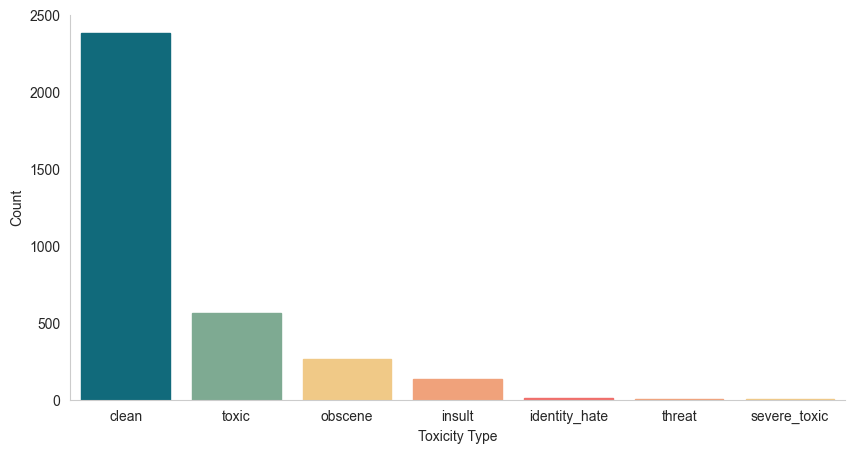

In [13]:
colors = ["#116A7B", "#7EAA92", "#F0C987", "#F0A27B", "#F06F6B", "#F0A27B", "#F0C987"]
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=list(dataset.keys()), y=list(dataset.values()), ax=ax)
for idx, bar in enumerate(ax.patches):
    bar.set_color(colors[idx])
ax.set_xlabel("Toxicity Type")
ax.set_ylabel("Count")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
fig.savefig("dataset_distribution.png", dpi=300, bbox_inches='tight')

In [14]:
# !git clone https://github.com/pl2599/GGWP-Toxic-Behavior.git ../data/GGWP-Toxic-Behavior

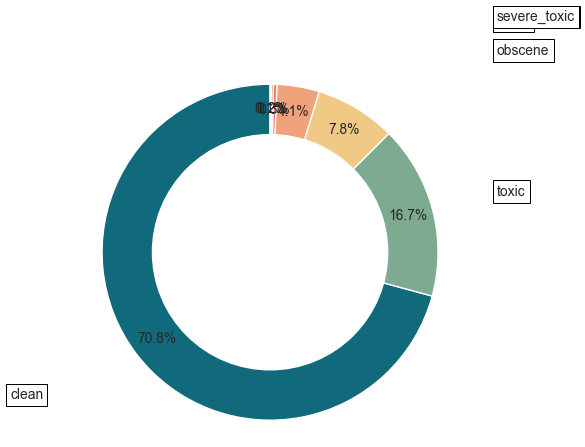

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'dataset' is a dictionary with your data
data = list(dataset.values())
labels = list(dataset.keys())

# Create a pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(data, startangle=90, colors=colors, autopct='%1.1f%%', pctdistance=0.85)

# Draw a white circle at the center (for aesthetics)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a box around the labels
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

plt.show()